# Assignment on Bike Sharing 

### Step 1 Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### Step 2 Reading dataset and understang data

In [2]:
# Reading csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')

In [3]:
bikeSharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Check shape
bikeSharing_df.shape

(730, 16)

In [5]:
# Checking dataframe for null and datatype
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the details of numerical data
bikeSharing_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Checking Columns
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Checking size of data
bikeSharing_df.size

11680

In [9]:
# Checking datatype of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Checking axes of data
bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
# Checking dimensions of data
bikeSharing_df.ndim

2

In [12]:
# Checking values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [13]:
# Renaming few columns for better readibilty
bikeSharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bikeSharing_df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Note---- There are 730 rows and 16 columns and also there is no null values in any of the column.

## Step 3 Cleaning Data

### Step 3.1 Dropping coloumns that are not useful for analysis

###### 1. dteday is removed as there are date features like mnth and year and weekday in columns so we will not consider day to day trend in demand for analysis.
###### 2. instant is just a row instance identifier.
###### 3. casual and registered variables are not available at the time of prediction so these describe the target variable cnt in target way = casual + registered, whcih also leads to data leakage.

In [14]:
# lets understand how old is the business by introducing a days_old variable
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bikeSharing_df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [15]:
# Droping instant column which is not required, dtedays as there is already month and weekday columns and casual and registered columns
bikeSharing_df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)
bikeSharing_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        1           1           2  14.110847   
1       1     0      1        0        2           1           2  14.902598   
2       1     0      1        0        3           1           1   8.050924   
3       1     0      1        0        4           1           1   8.200000   
4       1     0      1        0        5           1           1   9.305237   

      atemp  humidity  windspeed   cnt  days_old  
0  18.18125   80.5833  10.749882   985         0  
1  17.68695   69.6087  16.652113   801         1  
2   9.47025   43.7273  16.636703  1349         2  
3  10.60610   59.0435  10.739832  1562         3  
4  11.46350   43.6957  12.522300  1600         4

In [16]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [17]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
bikeSharing_df.corr()

season          year         month   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868  0.004012   
year       -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195  0.000685   
month       8.310321e-01 -5.162656e-16  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
humidity    2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.001182   

            workingday  weathersit      temp     atemp  humidity  windspeed  \
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607   
year         -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
month        -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
humidity      0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.015171   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
year        0.569728  0.866026  
month       0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.036183 -0.001182  
workingday -0.027640 -0.015171  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
humidity   -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

### Step 2 Handling Missing values

#### As there are no missing values still we will recheck


In [20]:
# Print null counts by column
bikeSharing_df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
days_old      0
dtype: int64

##### Note ---- No null values available

### Step 3.3 Handling outliers

In [21]:
# Handle outliers
bikeSharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt',
       'days_old'],
      dtype='object')

In [22]:
# Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
days_old      730
dtype: int64

### Step 4 Visualizing the data

In [23]:
# Converting season, weathersit, month and weekday to categoricaltypes
bikeSharing_df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)
bikeSharing_df.month.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace = True)
bikeSharing_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}, inplace = True)
bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace = True)
bikeSharing_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1   moderate  14.110847   
1  spring     0   jan        0     tue           1   moderate  14.902598   
2  spring     0   jan        0     wed           1       good   8.050924   
3  spring     0   jan        0     thu           1       good   8.200000   
4  spring     0   jan        0     fri           1       good   9.305237   

      atemp  humidity  windspeed   cnt  days_old  
0  18.18125   80.5833  10.749882   985         0  
1  17.68695   69.6087  16.652113   801         1  
2   9.47025   43.7273  16.636703  1349         2  
3  10.60610   59.0435  10.739832  1562         3  
4  11.46350   43.6957  12.522300  1600         4

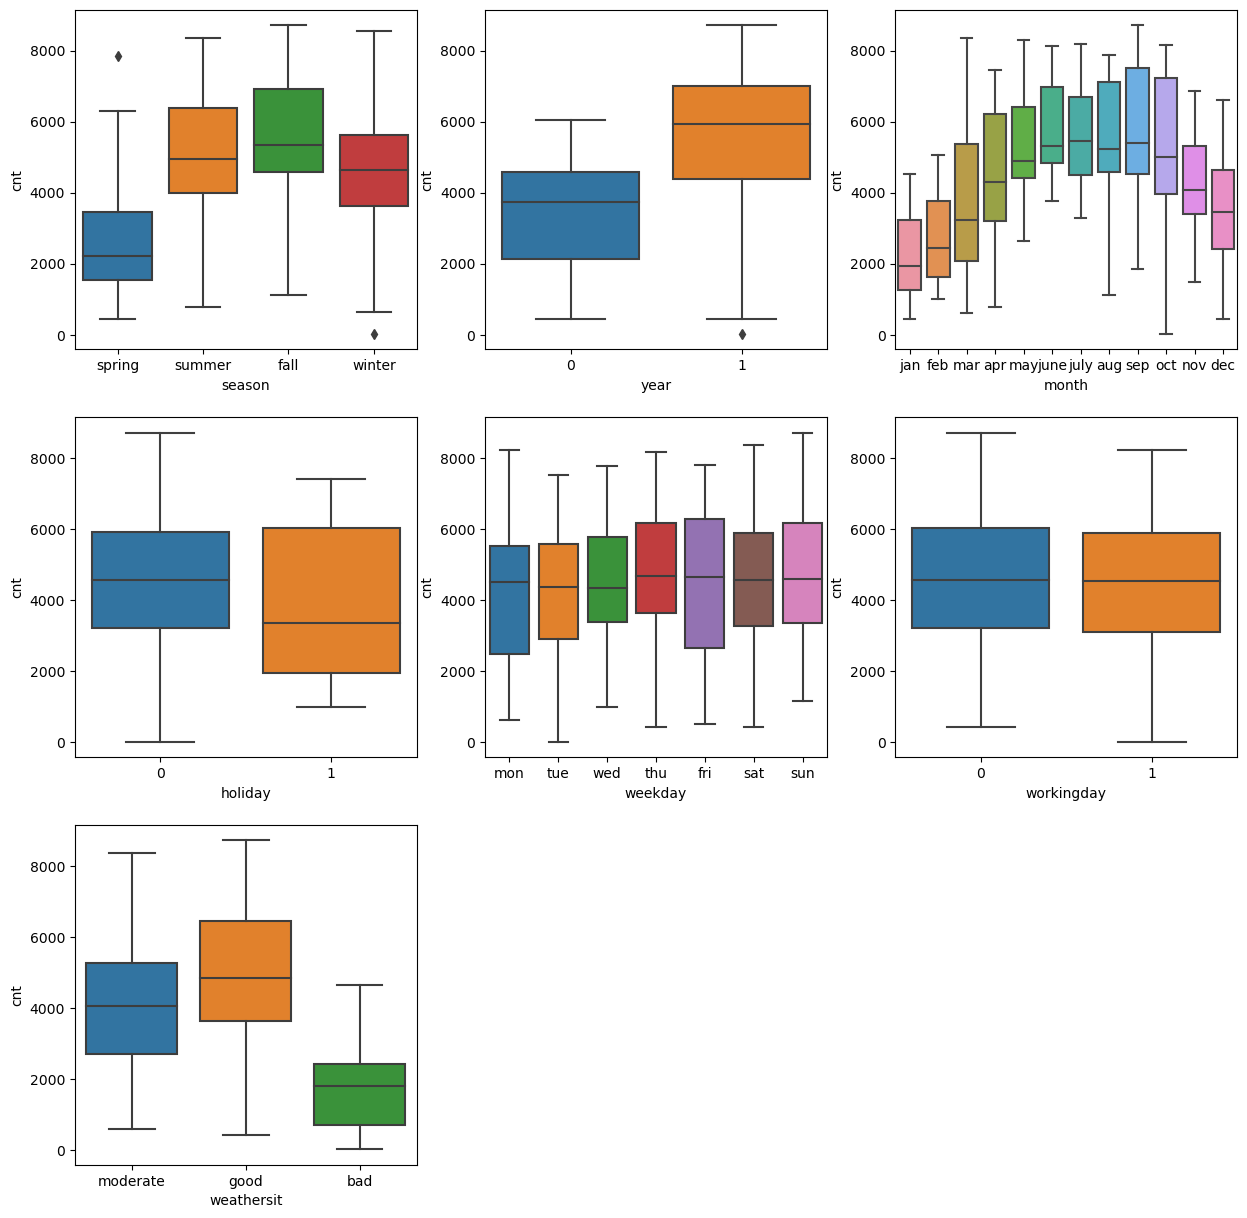

In [24]:
# Visualizing the categorical column
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()    

#### Note---- 
1. Fall has the highest demand for rental bikes.
2. Increase in demand in next year
3. Most of the bookings have been done during the month of may, june, july, aug, sep as September month has highest demand after september demand is declining.
4. When its not holiday, booking seems to be less in number which seems reasonable as on holidays.
5. Good weather conditions has the highest demand 
6. During september, bike sharing is more due to weather conditions are good.
7. Friday have more number of bookings as compared to the start of the week.
8. 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

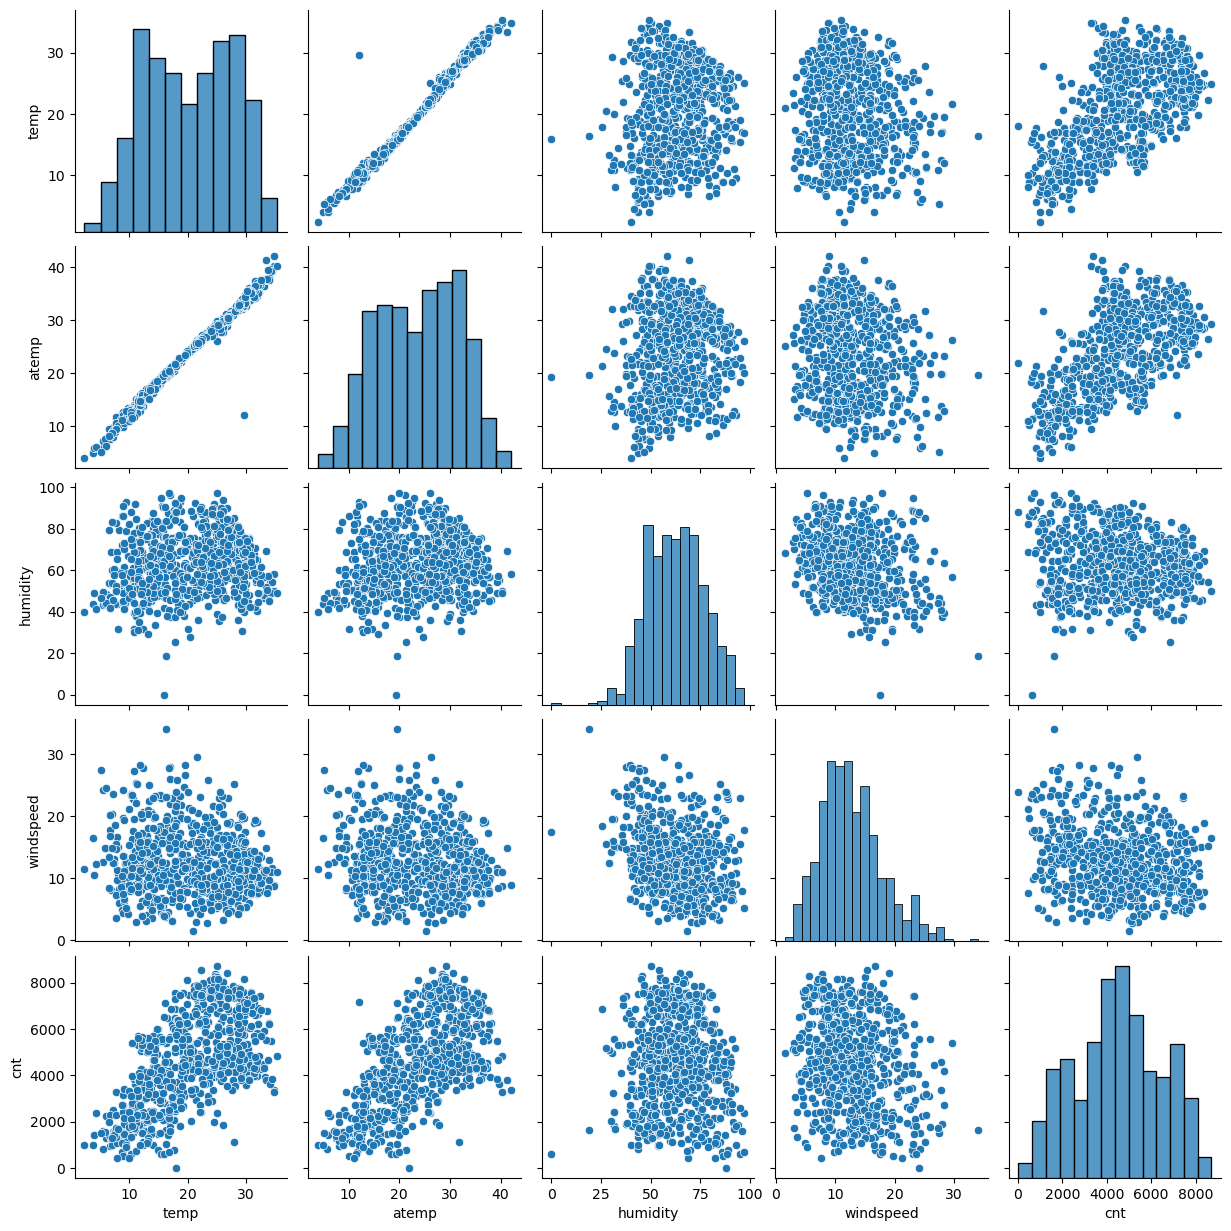

In [25]:
# Visualizing the numerical columns
sns.pairplot(data=bikeSharing_df,vars=['temp','atemp','humidity','windspeed','cnt'])

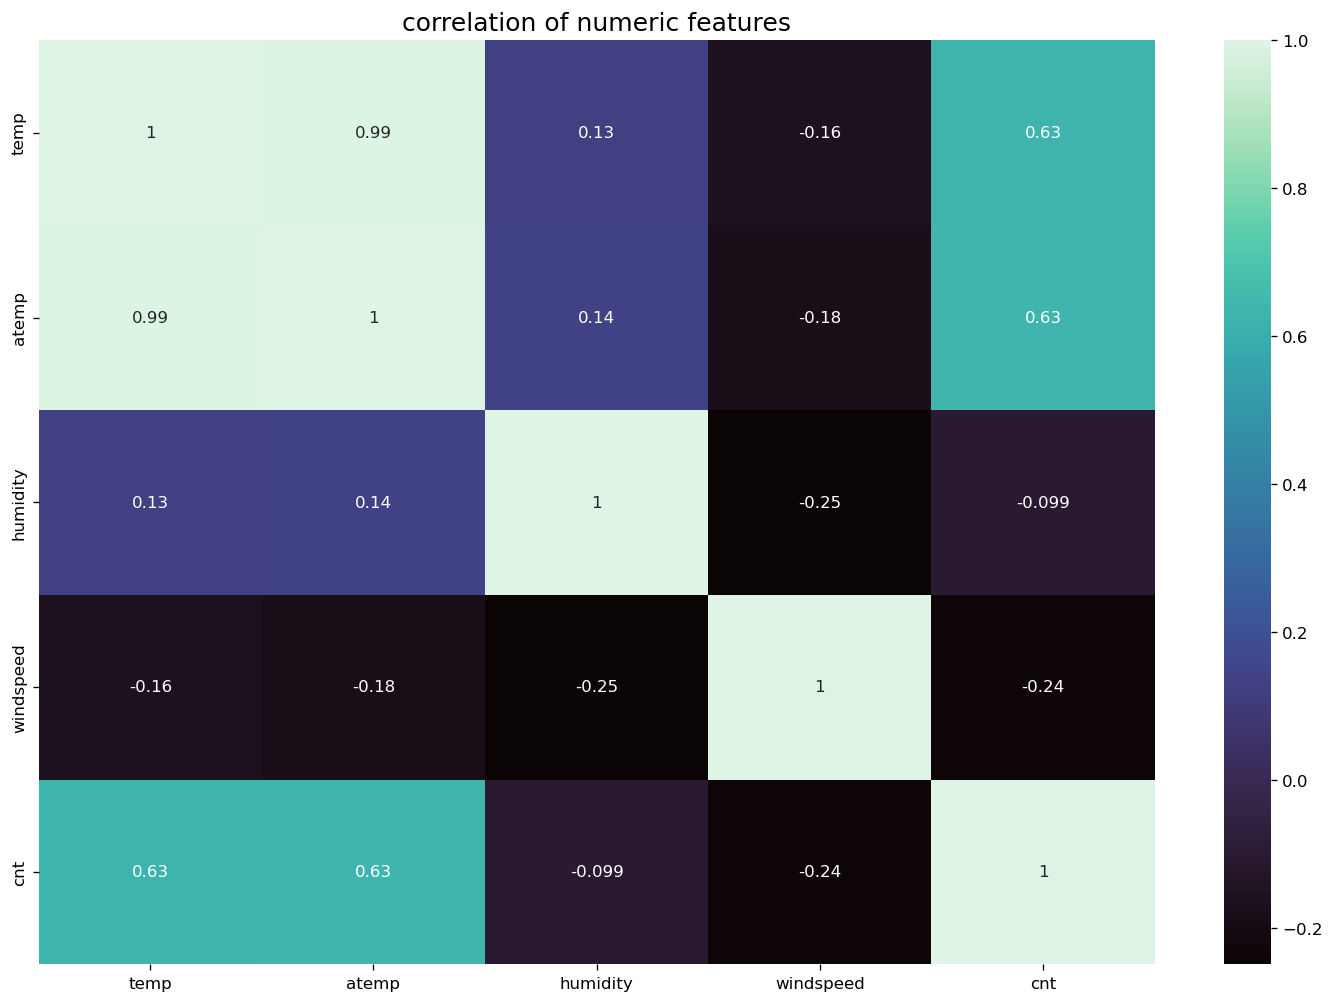

In [26]:
# Checking the correlation between numerical variables
num_features = ['temp','atemp','humidity','windspeed','cnt']
plt.figure(figsize=(15,10),dpi=120)
plt.title('correlation of numeric features',fontsize=15)
sns.heatmap(bikeSharing_df[num_features].corr(),annot=True,cmap='mako')
plt.show()

#### Note--- There is a linear relationship of temp and atemp with cnt variable

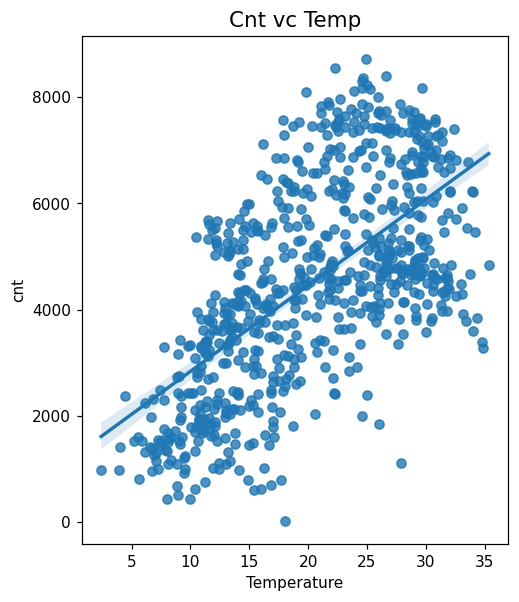

In [27]:
plt.figure(figsize=(5,6),dpi=110)
plt.title("Cnt vc Temp",fontsize=14)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Note ----- 
- Demand for bikes is positively correlated to temp and cnt is linearly increasing with temp indicating linear relation


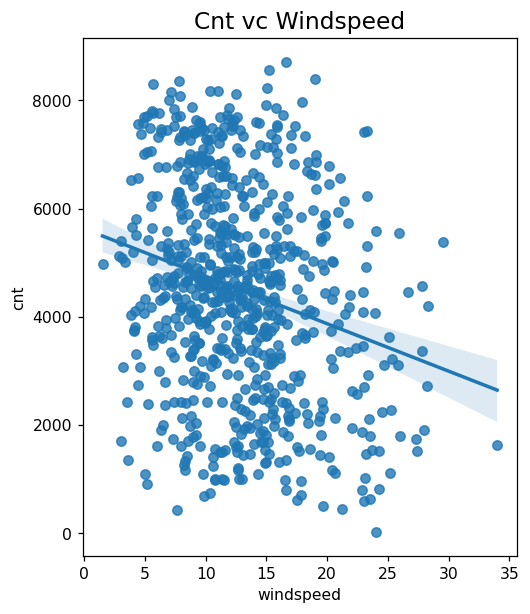

In [28]:
plt.figure(figsize=(5,6),dpi=112)
plt.title("Cnt vc Windspeed",fontsize=15)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### Note--- Windspeed values are more scatterd around and cnt is decreasing due to increase in windspeed.

### Step 5 Data Preparation for linear regression

#### 5.1 Creating dummy variable for month, weekday, weathersit and season variables

In [29]:
bikeSharing_df=pd.get_dummies(data=bikeSharing_df,columns=['month','season','weekday'],drop_first=True)
bikeSharing_df=pd.get_dummies(data=bikeSharing_df,columns=['weathersit'])

In [30]:
bikeSharing_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'days_old', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_july', 'month_june', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'season_spring', 'season_summer',
       'season_winter', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [31]:
bikeSharing_df.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           1  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   days_old  month_aug  ...  season_winter  weekday_mon  weekday_sat  \
0         0          0  ...              0            1            0   
1         1          0  ...              0            0            0   
2         2          0  ...              0            0            0   
3         3          0  ...              0            0            0   
4         4          0  ...              0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

## Step 6 Model Building

### Step 6.1 Splitting data into train and test

In [32]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 32)

In [33]:
# y to conatin only target variable
y=bikeSharing_df.pop('cnt')

# X is all remaining variable and also our independent variables
X=bikeSharing_df

# train test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
X.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
0     0        0           1  14.110847  18.18125   80.5833  10.749882   
1     0        0           1  14.902598  17.68695   69.6087  16.652113   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   

   days_old  month_aug  month_dec  ...  season_winter  weekday_mon  \
0         0          0          0  ...              0            1   
1         1          0          0  ...              0            0   
2         2          0          0  ...              0            0   
3         3          0          0  ...              0            0   
4         4          0          0  ...              0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   weathersit_bad  weathersit_good  weathersit_moderate  
0               0                0                    1  
1               0                0                    1  
2               0                1                    0  
3               0                1                    0  
4               0                1                    0  

[5 rows x 31 columns]

In [34]:
# Checking shape and size od train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### 6.2 Features scaling continuous variable

In [35]:
# Importing some important library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Let us scale continuous variable  fitting and transforming training set only
num_vars = ['temp','atemp','humidity','windspeed','days_old']

#use normalized scaler to scale
scaler = MinMaxScaler()

# fitting and transforming training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [37]:
X_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.499022    0.027397    0.704501    0.555633    0.522053    0.648898   
std      0.500489    0.163398    0.456714    0.232202    0.213782    0.146794   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.352195    0.340079    0.544225   
50%      0.000000    0.000000    1.000000    0.568130    0.543410    0.650923   
75%      1.000000    0.000000    1.000000    0.755555    0.697971    0.753113   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed    days_old   month_aug   month_dec  ...  season_winter  \
count  511.000000  511.000000  511.000000  511.000000  ...     511.000000   
mean     0.343667    0.500569    0.086106    0.080235  ...       0.236791   
std      0.162310    0.293783    0.280795    0.271923  ...       0.425529   
min      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
25%      0.227561    0.244154    0.000000    0.000000  ...       0.000000   
50%      0.314103    0.497937    0.000000    0.000000  ...       0.000000   
75%      0.436348    0.758597    0.000000    0.000000  ...       0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...       1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   511.000000   511.000000   511.000000   511.000000   511.000000   
mean      0.152642     0.138943     0.133072     0.140900     0.131115   
std       0.359994     0.346226     0.339986     0.348259     0.337857   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_bad  weathersit_good  weathersit_moderate  
count   511.000000      511.000000       511.000000           511.000000  
mean      0.152642        0.035225         0.630137             0.334638  
std       0.359994        0.184529         0.483240             0.472326  
min       0.000000        0.000000         0.000000             0.000000  
25%       0.000000        0.000000         0.000000             0.000000  
50%       0.000000        0.000000         1.000000             0.000000  
75%       0.000000        0.000000         1.000000             1.000000  
max       1.000000        1.000000         1.000000             1.000000  

[8 rows x 31 columns]

In [38]:
X_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
466     1        0           1  0.428749  0.404993  0.480464   0.552573   
96      0        0           0  0.479433  0.465495  0.621297   0.288453   
432     1        0           0  0.445643  0.417436  0.419493   0.808970   
687     1        0           1  0.407630  0.389264  0.642335   0.438441   
507     1        0           1  0.712791  0.663593  0.798196   0.164117   

     days_old  month_aug  month_dec  ...  season_winter  weekday_mon  \
466  0.638239          0          0  ...              0            0   
96   0.129298          0          0  ...              0            0   
432  0.591472          0          0  ...              0            0   
687  0.942228          0          0  ...              1            0   
507  0.694635          0          0  ...              0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
466            0            0            0            0            0   
96             1            0            0            0            0   
432            1            0            0            0            0   
687            0            0            0            1            0   
507            0            0            1            0            0   

     weathersit_bad  weathersit_good  weathersit_moderate  
466               0                1                    0  
96                0                1                    0  
432               0                0                    1  
687               0                0                    1  
507               0                0                    1  

[5 rows x 31 columns]

### 6.3 Build a model using RFE and automated approach

#### Use RFE to eliminate some columns

In [39]:
# Build a linear regression model using sklearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

### 6.4 Manual Elimination

#### Use of statsmodel api for building model 

In [ ]:
# Taking column that are to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Calculating VIFs and printing them


In [41]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF',ascending = False))
    

In [ ]:
# Print columns selected by RFE
X_train.columns[rfe.support_]


In [ ]:
# Feature not selected by RFE
X_train.columns[~rfe.support_]

In [ ]:
# Proceedings with 15 columns which are supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [ ]:
X_train_rfe.shape

### Step 7 Model building

#### 7.1-- Model 1--- Starting with variables selected by RFE

In [ ]:
# starting with columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

In [ ]:
# Checking and impact different variable
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2--- Dropping mnth_jan variable as it has high p value

In [ ]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 3--- Dropping hum variableas it has negative coefficient

In [ ]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 4----Dropping holiday variable due to negative coefficient

In [ ]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 5---- Dropping mnth_jul variable

In [ ]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 6--- Dropping temp variable

In [ ]:
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 7---- Replacing july with spring as they are highly correlated

In [ ]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 8--- Removing windspeed with spring as it is highly correlated

In [ ]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#### Model 9--- Dropping Sunday instead of saturday

In [ ]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

In [ ]:
#### Model 10--- Removing 'season_summer' and 'workingday' by adding temp

In [ ]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# ['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

### Note---
1. VIF is almost obtained
2.R2 is 0.82
3. There is no insignificant variable, no parameters to be added to the variable.

In [ ]:
# Building model contaiing all columns for selecting features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [ ]:
# Building final model by using sklearn 
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# Build a model from above columns 
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

### Step 8 Evaluation

In [ ]:
# Residual Analysis
y_train_pred = lr.predict(X_train[cols])

# PLotting histogram 
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)    

#### Note---- Errors are normally positioned to be mean as 0.

In [ ]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [ ]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

#### Note----
1. Actual and predicted results represents same pattern
2. errors terms are independent as R2 is same

In [ ]:
# Checking Linerarity
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [ ]:
# Using test data set for predicting vaues and scaling X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Transforming test data
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
# Presenting columns from final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
# Predicting values
y_test_pred = lr.predict(X_test[cols])

In [ ]:
# Finding out the R square value
r2_score(y_test,y_test_pred)

### Note --- 
R2 value for predictions on test data is almost same that is (0.815) as  R2 value of train data is same that is (0.818). This is a good R-squared value.

In [ ]:
# Understanding the speed by plooting y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 18)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_test_pred', fontsize = 15)

### Note---           
variance of the residuals (error terms) is constant across predictions

In [ ]:
# Plotting error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(12,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=18)              # Plot heading 
    plt.xlabel('Index', fontsize=16)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=15)  # Y-label

In [ ]:
plot_err_terms(y_test,y_test_pred)

### Note--- 
The error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters.

In [ ]:
bikeSharing_df.head()

In [ ]:
# Intrepretting model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

## Results

1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact. Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.